In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.prompt').hide();
 } else {
 $('div.input').show();
$('div.prompt').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code Toggle"></form>''')

In [3]:
from IPython.display import HTML

HTML('''
<a href="{{ site.links.github }}/raw/nist-pages/benchmarks/benchmark2.ipynb"
   download>
<button type="submit">Download Notebook</button>
</a>
''')

# Benchmark Problem 2: Ostwald Ripening

In [2]:
from IPython.display import HTML

HTML('''{% include jupyter_benchmark_table.html num="[2]" revision=1 %}''')

* [Free energy and dynamics](#Free-energy-and-dynamics)
	* [Figure 1: Free energy density surface](#Figure-1:-Free-energy-density-surface)
* [Parameter values](#Parameter-values)
* [Domain geometries and boundary conditions](#Domain-geometries-and-boundary-conditions)
	* [(a) Square periodic](#%28a%29-Square-periodic)
	* [(b) Square no-flux](#%28b%29-Square-no-flux)
	* [(c) T-shape](#%28c%29-T-shape)
	* [(d) Sphere](#%28d%29-Sphere)
* [Initial conditions](#Initial-conditions)
	* [Initial conditions for (a), (b) and (c)](#Initial-conditions-for-%28a%29,-%28b%29-and-%28c%29)
		* [Figure 2: initial $c$ for (a), (b) and (c)](#Figure-2:-initial-$c$-for-%28a%29,-%28b%29-and-%28c%29)
		* [Figure 3: initial $\eta_1$ for (a), (b) and (c)](#Figure-3:-initial-$\eta_1$-for-%28a%29,-%28b%29-and-%28c%29)
	* [Initial conditions for (d)](#Initial-conditions-for-%28d%29)
		* [Figure 4: initial $c$ for (d)](#Figure-4:-initial-$c$-for-%28d%29)
		* [Figure 5: initial $\eta_1$ for (d)](#Figure-5:-initial-$\eta_1$-for-%28d%29)
* [Results](#Results)

See the journal publication entitled ["Benchmark problems for numerical implementations of phase field models"][benchmark_paper] for more details about the benchmark problems. Furthermore, read [the extended essay][benchmarks] for a discussion about the need for benchmark problems.

[benchmarks]: ../
[benchmark_paper]: http://dx.doi.org/10.1016/j.commatsci.2016.09.022

## Free energy and dynamics

The atomic fraction of solute is specified by the conserved
variable $c$, while the phase is indicated by a structural order
parameter, $\eta$.  The structural order parameter is non-conserved
and is a phenomenological phase descriptor, such that the $\alpha$
phase is indicated by $\eta=0$, while the $\beta$ phase is indicated
by $\eta=1$. If multiple energetically equivalent orientation variants
exist (for example, due to crystallographic symmetry considerations
or ordered and disordered phases), the model may include $p$ number of
structural order parameters, $\eta_{p}$, with one for each orientation
variant.  We include a nontrivial number of order parameters by
setting $p=4$, a value commonly used in superalloy models; this will
stress the numerical solver while not making the problem intractable.

In this benchmark problem, the free energy of the system is based on
the formulation presented in Ref. [ZHU][] and is expressed as

$$
F=\int_{V}\left(f_{chem}\left(c,\eta_{1},...\eta_{p}\right)+\frac{\kappa_{c}}{2}|\nabla
c|^{2}+\sum_{i=1}^{p}\frac{\kappa_{\eta}}{2}|\nabla\eta_{i}|^{2}\right)dV
$$

where $\kappa_{c}$ and $\kappa_{\eta}$ are the gradient energy
coefficients for $c$ and $\eta_{i}$, respectively. While the model in
Ref. [ZHU][] follows the Kim-Kim-Suzuki ([KKS][]) formulation for
interfacial energy, we use the
Wheeler-Boettinger-McFadden ([WBM][])  formulation for
simplicity.  In the [KKS][] model, the interface is treated as an
equilibrium mixture of two phases with fixed compositions such that an
arbitrary diffuse interface width may be specified for a given
interfacial energy.  In the [WBM][] model, interfacial energy and
interfacial width are linked with the concentration, such that very
high resolution across the interface may be required to incorporate
accurate interfacial energies.

The formulation for $f_{chem}$ in Ref. [ZHU][] is adapted for
our benchmark problem as

\begin{equation}
f_{chem}\left(c,\eta_{1},...\eta_{p}\right)=
f^{\alpha}\left(c\right)\left[1-h\left(\eta_{1},
...\eta_{p}\right)\right]+f^{\beta}\left(c\right)h\left(\eta_{1},
...\eta_{p}\right)+wg\left(\eta_{1},
...\eta_{p}\right),
\end{equation}

where $f^{\alpha}$ and $f^{\beta}$ are the chemical free energy
densities of the $\alpha$ and $\beta$ phases, respectively,
$h\left(\eta_{1},...\eta_{p}\right)$ is an interpolation function, and
$g\left(\eta_{1},...\eta_{p}\right)$ is a double-well function. The
function $h$ increases monotonically between $h(0)=0$ and $h(1)=1$,
while the function $g$ has minima at $g(0)=0$ and $g(1)=0$. The height
of the double well barrier is controlled by $w$. We choose the simple
formulation

\begin{equation}
f^{\alpha}\left(c\right)=\varrho^{2}\left(c-c_{\alpha}\right)^{2}
\end{equation}

\begin{equation}
f^{\beta}\left(c\right)=\varrho^{2}\left(c_{\beta}-c\right)^{2}
\end{equation}

\begin{equation}
h\left(\eta_{1},...\eta_{p}\right)=\sum_{i=1}^{p}\eta_{i}^{3}\left(6\eta_{i}^{2}-15\eta_{i}+10\right)
\end{equation}

\begin{equation}
g\left(\eta_{1},...\eta_{p}\right)=\sum_{i=1}^{p}\left[\eta_{i}^{2}\left(1-\eta_{i}\right)^{2}\right]+\alpha\sum_{i=1}^{p}\sum_{j\neq
  i}^{p}\eta_{i}^{2}\eta_{j}^{2},
\end{equation}

where $f^{\alpha}$ and $f^{\beta}$ have minima at $c_{\alpha}$ and
$c_{\beta}$, $\varrho^{2}$ controls the curvature of the free
energies, and $\alpha$ controls the energy penalty incurred by the
overlap of multiple non-zero $\eta_{i}$ values at the same point.
Because the energy values of the minima are the same
([Fig. 1](#Figure-1:-Free-energy-density-surface)), $c_{\alpha}$ and
$c_{\beta}$ correspond exactly with the equilibrium atomic fractions
of the $\alpha$ and $\beta$ phases.

The time evolution of $c$ is again governed by the Cahn-Hilliard
equation, see [CAHN][] and [ELLIOT][],

\begin{equation}
\frac{\partial c}{\partial
  t}=\nabla\cdot\Bigg\{M\nabla\left(\frac{\partial f_{chem}}{\partial
  c}-\kappa_{c}\nabla^{2}c\right)\Bigg\}.
\end{equation}

The Allen-Cahn equation, see [ALLEN][], which is based on
gradient flow, governs the evolution of $\eta_{i}$,

\begin{equation}
\frac{\partial\eta_{i}}{\partial t}=-L\left[\frac{\delta F}{\delta
    \eta_{i}}\right]=-L\left(\frac{\partial
  f_{chem}}{\partial\eta_{i}}-\kappa_{\eta}\nabla^{2}\eta_{i}\right),
\end{equation}

where $L$ is the kinetic coefficient of $\eta_{i}$. We choose $M=5$
and $L=5$ so that the transformation is diffusion-controlled and the
kinetic coefficients and gradient energy coefficients are
isotropic. In addition, we again choose $c_{\alpha}=0.3$ and
$c_{\beta}=0.7$, and further specify $k_{c}=k_{\eta}=3$,
$\varrho=\sqrt[]{2}$, $w=1$, and $\alpha=5$.  For these values, the
diffuse interface between $0.1<\eta<0.9$ has a width of of 4.2 units.

[ZHU]: http://dx.doi.org/10.1016/j.actamat.2004.02.032
[KKS]: https://doi.org/10.1103/PhysRevE.60.7186
[WBM]: https://doi.org/10.1103/PhysRevA.45.7424
[CAHN]: http://dx.doi.org/10.1016/0001-6160(61)90182-1
[ELLIOT]: http://dx.doi.org/10.1007/BF01396363
[ALLEN]: http://dx.doi.org/10.1016/0001-6160(79)90196-2


#### Figure 1: Free energy density surface

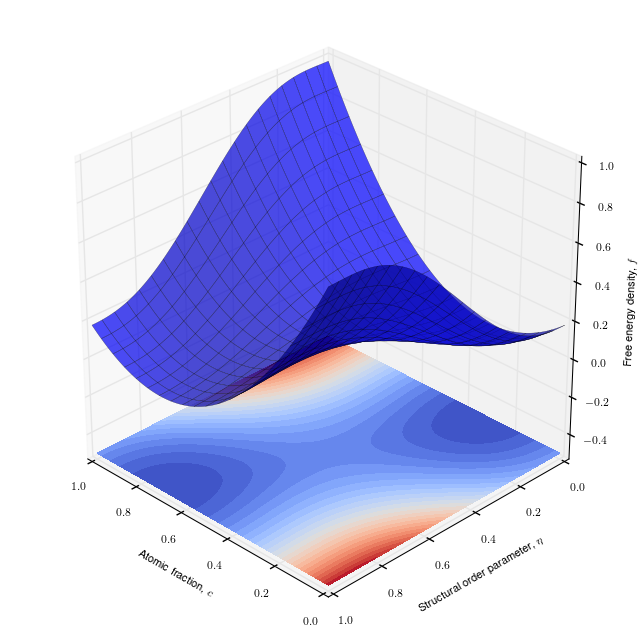

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy
from matplotlib import cm


def free_energy_chem(conc, c_alpha_beta, rho_curv):
    """Chemical free energy function.
    """
    return rho_curv**2 * (conc - c_alpha_beta)**2

def h_interp(eta):
    """Interpolation function
    """
    return eta**3 * (6 * eta**2 - 15 * eta + 10)

def g_well(eta, alpha):
    """Double well function
    """
    return eta**2 * (1 - eta)**2

def free_energy(conc, eta, w_height, rho_curv, c_alpha, c_beta, alpha):
    """Total free energy function.
    """
    return free_energy_chem(conc, c_alpha, rho_curv) * (1 - h_interp(eta)) \
           + free_energy_chem(conc, c_beta, rho_curv) * h_interp(eta) \
           + w_height * g_well(eta, alpha)

def plot_figure(params, dpi=200):
    fig = plt.figure(figsize=(8, 8), dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(params['conc'],
                           params['eta'],
                           free_energy(**params),
                           alpha=0.7,
                           linewidth=0.2,
                           rstride=5,
                           cstride=5,
                           antialiased=True)

    cset = ax.contourf(params['conc'],
                       params['eta'],
                       free_energy(**params),
                       30,
                       zdir='f',
                       offset=-0.5,
                       cmap=cm.coolwarm)

    ax.set_xlabel(r"Atomic fraction, $c$", fontsize=8)
    ax.set_ylabel(r"Structural order parameter, $\eta$", fontsize=8)
    ax.set_zlabel(r"Free energy density, $f$", fontsize=8)
    ax.set_zlim3d(-0.5, 1)
    ax.tick_params(axis="both", which="major", labelsize=8)

    #adjust camera settings
    ax.elev = 30
    ax.azim = 135
    plt.show()


linspace_conc = numpy.linspace(0.0, 1.0, 100)
linspace_eta = numpy.linspace(0.0, 1.0, 100)
conc, eta = numpy.meshgrid(numpy.linspace(0.0, 1.0, 100),
                           numpy.linspace(0.0, 1.0, 100))

params = dict(conc=conc,
              eta=eta,
              w_height=1.0,
              rho_curv=numpy.sqrt(2.0),
              c_alpha=0.3,
              c_beta=0.7,
              alpha=5.0)

plot_figure(params, dpi=50)

## Parameter values

<table width="200">

<tr>
<td> $c_{\alpha}$ </td>
<td> 0.3 </td>
</tr>

<tr>
<td> $c_{\beta}$ </td>
<td> 0.7 </td>
</tr>

<tr>
<td> $\varrho$ </td>
<td> $\sqrt{2}$ </td>
</tr>

<tr>
<td> $\kappa_c$ </td>
<td> 3 </td>
</tr>

<tr>
<td> $\kappa_{\eta}$ </td>
<td> 3 </td>
</tr>

<tr>
<td> $M$ </td>
<td> 5 </td>
</tr>

<tr>
<td> $w$ </td>
<td> 1 </td>
</tr>

<tr>
<td> $\alpha$ </td>
<td> 5 </td>
</tr>

<tr>
<td> $L$ </td>
<td> 5 </td>
</tr>

<tr>
<td> $\epsilon$ </td>
<td> 0.05 </td>
</tr>

<tr>
<td> $c_0$ </td>
<td> 0.5 </td>
</tr>

<tr>
<td> $\epsilon_{sphere}$ </td>
<td> 0.05 </td>
</tr>

<tr>
<td> $\epsilon_{\eta}$ </td>
<td> 0.1 </td>
</tr>

<tr>
<td> $\psi$ </td>
<td> 1.5 </td>
</tr>

<tr>
<td> $\epsilon_{\eta}^{sphere}$ </td>
<td> 0.1 </td>
</tr>
</table>

## Domain geometries and boundary conditions

Several boundary conditions, initial conditions and computational domain geometries
are used to challenge different aspects of the numerical solver implementation. We test four combinations that are increasingly difficult to solve: two
with square computational domains, see (a) and (b), with side lengths of 200 units, one with a computational
domain in the shape of a "T," see (c), with a total height of 120 units, a total width of 100 units,
and horizontal and vertical section widths of 20 units, and one in which the computational domain is the surface of a sphere with a radius of r = 100 units, see (d). While most codes
readily handle rectilinear domains, a spherical domain may pose problems, such as having the
solution restricted to a two-dimensional curved surface. The coordinate systems and origins
are given in [Fig. 2](#Figure-2:-initial-$c$-for-%28a%29,-%28b%29-and-%28c%29). Periodic boundary conditions are applied to one square domain, see (a), while
no-flux boundaries are applied to the other square domain, see (b), and the "T"-shaped domain, see (c). Periodic boundary conditions are commonly used with rectangular or rectangular prism domains
to simulate an infinite material, while no-flux boundary conditions may be used to simulate
an isolated piece of material or a mirror plane. As the computational domain is compact
for the spherical surface, no boundary conditions are specified for it. Note that the same
initial conditions are used for the square computational domains with no-flux, see (b), and periodic boundary conditions, see (a), such that when periodic boundary conditions
are applied, there is a discontinuity in the initial condition at the domain boundaries.

### (a) Square periodic

A 2D square domain with $L_x = L_y = 200$ and periodic boundary conditions.

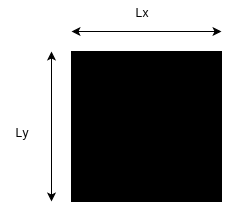

In [9]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

from IPython.display import SVG

try:
    out = SVG(filename='../images/block1.svg')
except:
    out = None
out

### (b) Square no-flux

A 2D square domain with $L_x = L_y = 200$ and no flux boundary conditions.

### (c) T-shape

A T-shaped region with zero flux boundary conditions and with dimensions, $a=b=100$  and  $c=d=20$.

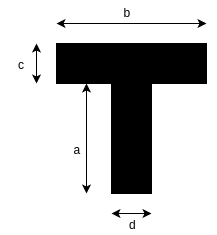

In [8]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

from IPython.display import SVG

try:
    out = SVG(filename='../images/t-shape.svg')
except:
    out = None
out

### (d) Sphere

The domain is the surface of a sphere with radius 100.

## Initial conditions

The initial conditions are chosen such that the average value of $c$ over the computational domain is approximately $0.5$.

### Initial conditions for (a), (b) and (c)

The initial value for $c$ on the square and "T" computational domains is
specified by 
$$
c\left(x,y\right) =
c_{0}+\epsilon\left[\cos\left(0.105x\right)\cos\left(0.11y\right)+\left[\cos\left(0.13x\right)\cos\left(0.087y\right)\right]^{2}\right.\nonumber \\
  \left.+\cos\left(0.025x-0.15y\right)\cos\left(0.07x-0.02y\right)\right],
$$
where $c_{0}=0.5$ and $\epsilon=0.05$. The intial value for $\eta_i$ on the square and "T" domain are given by,

\begin{align*}
\eta_{i}\left(x,y\right)  = & \epsilon_{\eta}\left\{ \cos\left(\left(0.01i\right)x-4\right)\cos\left(\left(0.007+0.01i\right)y\right)\right.\nonumber \\
   & +\cos\left(\left(0.11+0.01i\right)x\right)\cos\left(\left(0.11+0.01i\right)y\right)\nonumber \\
   & +\psi\left[\cos\left(\left(0.046+0.001i\right)x+\left(0.0405+0.001i\right)y\right)\right.\nonumber \\
   & \left.\left.\cos\left(\left(0.031+0.001i\right)x-\left(0.004+0.001i\right)y\right)\right]^{2}\right\} ^{2}
\end{align*}

where $\epsilon_{\eta}$=0.1 and $\psi$=1.5.

#### Figure 2: initial $c$ for (a), (b) and (c)

In [4]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

import numpy as np
from bokeh.plotting import figure, show, output_file, output_notebook, gridplot
from bokeh.models import FixedTicker
output_notebook()
from bokeh.palettes import brewer, RdBu11, Inferno256
from bokeh.models.mappers import LinearColorMapper
import matplotlib as plt
import matplotlib.cm as cm
import numpy as np
from bokeh.models import HoverTool, BoxSelectTool

def generate_colorbar(mapper, width, height, n_ticks):
    high, low = mapper.high, mapper.low
    pcb = figure(width=width,
                 height=height,
                 x_range=[0, 1],
                 y_range=[low, high],
                 min_border_right=10)
    pcb.image(image=[np.linspace(low, high, 400).reshape(400,1)],
              x=[0],
              y=[low],
              dw=[1],
              dh=[high - low],
              color_mapper=mapper)
    pcb.xaxis.major_label_text_color = None
    pcb.xaxis.major_tick_line_color = None
    pcb.xaxis.minor_tick_line_color = None
    pcb.yaxis[0].ticker=FixedTicker(ticks=np.linspace(low, high, n_ticks))
    return pcb

def generate_contour_plot(data, xrange, yrange, width, height, mapper):               
    p = figure(x_range=xrange, y_range=yrange, width=width, height=height, min_border_right=10)
    aa = p.image(image=[data],
                 x=xrange[0],
                 y=yrange[0],
                 dw=xrange[1] - xrange[0],
                 dh=yrange[1] - yrange[0],
                 color_mapper=mapper)
    return p


def get_data(xrange, yrange, data_func):
    N = 300
    xx, yy = np.meshgrid(np.linspace(xrange[0], xrange[1], N),
                         np.linspace(yrange[0], yrange[1], N))
    data = data_func(xx, yy)
    return xx, yy, data

def get_color_mapper(mpl_cm, high, low):
    colormap =cm.get_cmap(mpl_cm)
    bokehpalette = [plt.colors.rgb2hex(m) for m in colormap(np.arange(colormap.N))]
    mapper = LinearColorMapper(high=high,
                               low=low,
                               palette=bokehpalette)
    return mapper

def get_data_square(data_func):
    return get_data((0, 200), (0, 200), data_func)

def get_data_tshape(data_func):
    xx, yy, data = get_data((-40, 60), (0, 120), data_func)
    mask = ((xx < 0) | (xx > 20)) & (yy < 100)
    data[mask] = 0.5
    return xx, yy, data

def get_plot_grid(data_xy_func, high, low, n_ticks):
    mapper = get_color_mapper(cm.coolwarm, high, low)
    width, height = 300, 300

    all_plots = []
    for data_func in get_data_square, get_data_tshape:
        xx, yy, data = data_func(data_xy_func)
        contour_plot = generate_contour_plot(data,
                                             (xx.min(), xx.max()),
                                             (yy.min(), yy.max()),
                                             width,
                                             height,
                                             mapper)
        all_plots.append(contour_plot)
    
    all_plots.append(generate_colorbar(mapper, width // 4, height, n_ticks))
    return gridplot([all_plots]) 

def initial_concentration(x, y, epsilon=0.05, c_0=0.5):
    return c_0 + epsilon * (np.cos(0.105 * x) * np.cos(0.11 * y) + (np.cos(0.13 * x) * np.cos(0.087 * y))**2 \
                            + np.cos(0.025 * x - 0.15 * y) * np.cos(0.07 * x - 0.02 * y))

show(get_plot_grid(initial_concentration, 0.65, 0.35, 7),
     notebook_handle=True,
     browser=None);

Loading BokehJS ...

#### Figure 3: initial $\eta_1$ for (a), (b) and (c)

In [5]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

def initial_eta(x, y, epsilon_eta=0.1, psi=1.5, i=1):
    eta = epsilon_eta * (np.cos(0.01 * i * x - 4) * np.cos((0.007 + 0.01 * i) * y) \
                         + np.cos((0.11 + 0.01 * i) * x) * np.cos((0.11 + 0.01 * i) * y) \
                         + psi * (np.cos((0.046 + 0.001 * i) * x + (0.0405 + 0.001 * i) * y) \
                                  * np.cos((0.031 + 0.001 * i) * x - (0.004 + 0.001 * i) * y))**2)**2
    return eta

show(get_plot_grid(initial_eta, 1, 0, 6),
     notebook_handle=True,
     browser=None);

### Initial conditions for (d)

The initial value of $c$ for the spherical computational domain is specified by
$$
c\left(\theta,\phi\right) = c_{0}+\epsilon_{sphere}\left[\cos\left(8\theta\right)\cos\left(15\phi\right)+\left(\cos\left(12\theta\right)\cos\left(10\phi\right)\right)^{2}\right.\nonumber \\
+\left.\cos\left(2.5\theta-1.5\phi\right)\cos\left(7\theta-2\phi\right)\right],
$$
where $\epsilon_{\text{sphere}}=0.05$ and $c_0=0.5$, and $\theta$ and $\phi$ are the polar and azimuthal angles, respectively, in a spherical coordinate system. These angles are translated into a Cartesian system as $\theta=\cos^{-1}\left(z/r\right)$ and $\phi=\tan^{-1}\left(y/x\right)$ dependent upon angle.

The intial value for $\eta_i$ for the spherical domain is specified by

\begin{eqnarray}
\eta_{i}\left(\theta,\phi\right) & = & \epsilon_{\eta}^{sphere} \left\{ \cos\left(i\theta-4\right)\cos\left(\left(0.7+i\right)\phi\right)\right.\nonumber \\
 &  & +\cos\left(\left(11+i\right)\theta\right)\cos\left(\left(11+i\right)\phi\right)\nonumber \\
 &  & +\psi\left[\cos\left(\left(4.6+0.1i\right)\theta+\left(4.05+0.1i\right)\phi\right)\right.\nonumber \\
 &  & \left.\left.\cos\left(\left(3.1+0.1i\right)\theta-\left(0.4+0.1i\right)\phi\right)\right]^{2} \right\} ^{2}
\end{eqnarray}

where  $\epsilon_{\eta}^{sphere}=0.1$ and $i=1,\ldots,4$ enumerates the order parameters corresponding to the different phase variants.

#### Figure 4: initial $c$ for (d)

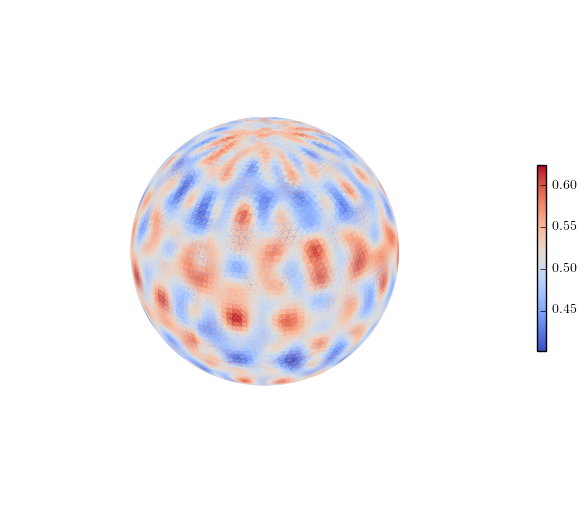

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib import ticker
import matplotlib.cm as cm


def get_geometry(R=100., NN=60):
    X, Y, Z = np.mgrid[-R * 1.1:R * 1.1:NN * 1j, -R * 1.1:R * 1.1:NN * 1j, -R * 1.1:R * 1.1:NN * 1j]
    surf_eq = np.sqrt(X**2 + Y**2 + Z**2) - R
    coords, triangles = measure.marching_cubes(surf_eq, 0)
    rescale = lambda xx: (2 * R * 1.1 * (np.array(xx) / (NN - 1) - 0.5)).ravel()
    return tuple(rescale(xx) for xx in zip(*coords)) + (triangles,)

def triangle_data(data_func, geometry):
    x, y, z, triangles = geometry
    return data_func(x, y, z)[triangles].mean(1)

def get_mpl_triangulation(geometry):
    x, y, z, triangles = geometry
    return Triangulation(x, y, triangles)

def make_colorbar(fig, collec):
    colorbar = fig.colorbar(collec, shrink=0.3)
    colorbar.locator = ticker.MaxNLocator(nbins=5)
    colorbar.update_ticks()

def plot_3d_sphere(data_func):
    geometry = get_geometry()
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')
    collec = ax.plot_trisurf(get_mpl_triangulation(geometry),
                             geometry[2],
                             cmap=cm.coolwarm,
                             linewidth=0.0,
                             edgecolor="none")  
    collec.set_array(triangle_data(data_func, geometry))
    collec.autoscale()
    ax.set_aspect('equal')
    ax.set_axis_off()
    make_colorbar(fig, collec)
    plt.show()

def conc_func(x, y, z, c_0=0.5, epsilon_sphere=0.05):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan(y / x)
    return c_0 + epsilon_sphere * (np.cos(8 * theta) * np.cos(15 * phi) \
                                   + (np.cos(12 * theta) * np.cos(10 * phi))**2 \
                                   + np.cos(2.5 * theta - 1.5 * phi) * np.cos(7 * theta - 2 * phi))

plot_3d_sphere(conc_func)

#### Figure 5: initial $\eta_1$ for (d)

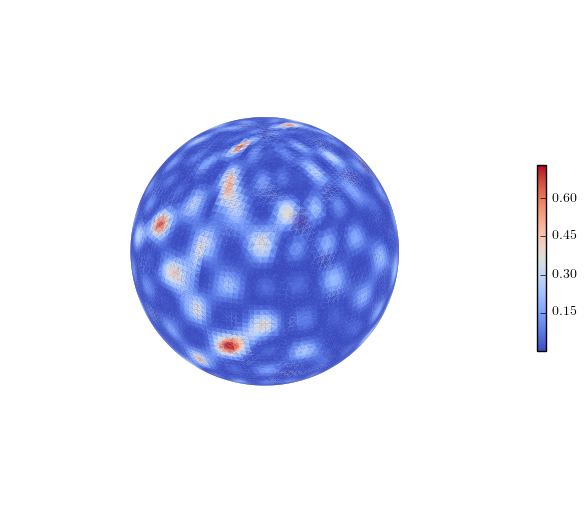

In [9]:
def eta_func(x, y, z, epsilon_eta_sphere=0.1, psi=1.5, index=1):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan(y / x)
    return epsilon_eta_sphere * (
               np.cos(index * theta - 4) * np.cos((0.7 + index) * phi) \
               + np.cos((11 + index) * theta) * np.cos((11 + index) * phi) \
               + psi * (np.cos((4.6 + 0.1 * index) * theta + (4.05 + 0.1 * index) * phi) \
                        * np.cos((3.1 + 0.1 * index) * theta - (0.4 + 0.1 * index) * phi))**2)**2
    
plot_3d_sphere(eta_func)

## Results

Results from this benchmark problem are displayed on the [simulation result page]({{ site.baseurl }}/simulations) for different codes.

## Feedback

Feedback on this benchmark problem is appreciated. If you have questions, comments, or seek clarification, please contact the [CHiMaD phase field community](https://pages.nist.gov/chimad-phase-field/community/) through the [Gitter chat channel](https://gitter.im/usnistgov/chimad-phase-field) or by [email](https://pages.nist.gov/chimad-phase-field/mailing_list/). If you found an error, please file an [issue on GitHub](https://github.com/usnistgov/chimad-phase-field/issues/new).